# 모든 라이브러리 사용한 단일 선형회귀 모델

In [57]:
#라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch #pytorch
import torch.nn as nn
import torch.optim as optim
#마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus']=False 

#넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

#warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## 데이터 전처리(변수 정의)

#데이터가 몇개 없어서 직접 대입하는 경우
sample_data1=np.array([직접 기입])
x=sample_data1[:,0]
y=sample_data1[:,1]



In [34]:
#데이터가 많아서 사이트에서 가져오는 경우(직접 기입하지 않는 경우)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
#pandas이용해서 데이터 긁어오기
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)
#pandas를 이용해서 데이터셋을 끌고옴
#(처음부터끝까지 2칸 간격으로 첫번째부터 마지막데이터까지 다 가져옴, 2번째줄부터 끝가지 2칸 간격으로 마지막데이터 버리고 가져옴)
x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2] #제일 마지막 데이터=부동산 가격
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 결과 확인
#print('원본 데이터', x_org.shape, yt.shape)
#print('항목명: ', feature_names)

In [35]:
#여러개 데이터 중에서 내가 필요한 데이터 추출(만약 데이터가 하나만 있다면 궅이 이과정은 거칠 필요 없음)
x1=x_org[:,feature_names=='RM']


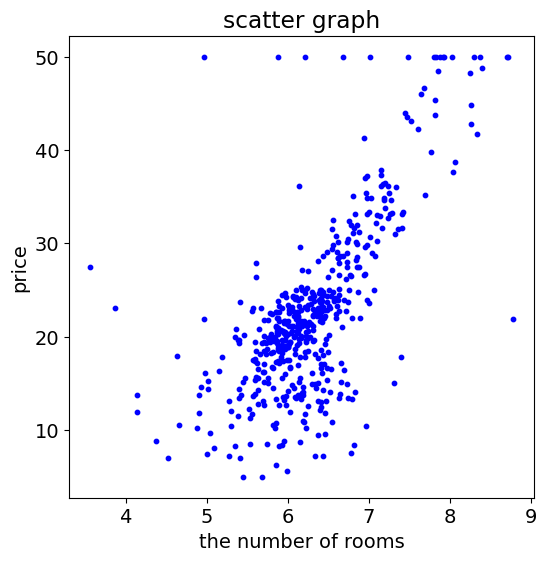

In [47]:
#정답 데이터 산포도 출력
plt.scatter(x1,yt, s=10, c='b')
plt.xlabel('the number of rooms')
plt.ylabel('price')
plt.title('scatter graph')
plt.show()

## 예측 함수

In [116]:
# 변수 정의
n_input=x1.shape[1]
n_output=1

# 클래스 정의
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        #부모클래스인 nn.Module 초기화시킴 왜??
        super().__init__()
        self.l1=nn.Linear(n_input,n_output)

    def forward(self,x):
        x1=self.l1(x) #선형함수로 예측하겠다는 함수 정의(예측된 y값을 얻는 연산이 forward)
        return x1

#Net class의 인스턴스 생성
#1입력 1출력 선형 모델
net=Net(n_input,n_output) #예측 함수
#print(net)

## 손실함수 / 최적화함수

In [145]:
#손실 함수 : 평균제곱오차
criterion=nn.MSELoss()
lr=0.01 #학습률

#최적화 함수 : 경사하강법
optimizer=optim.SGD(net.parameters(),lr=lr)
#print(net.parameters)

## 예측 계산 / 손실 계산 / 경사 계산 / 파라미터 수정

In [140]:
#입력값 x와 정답 yt의 텐서 변수화
inputs=torch.tensor(x1).float()
labels=torch.tensor(yt).float()

#손실 계산을 위해 (n,1)차원 행렬로 변환
labels1=labels.view((-1,1))

outputs=net(inputs) # 예측 계산
loss=criterion(outputs, labels1) # 손실 계산
loss.backward() # 경사 계산

#경사 계산 결과 확인
print(net.l1.weight.grad)
print(net.l1.bias.grad)

optimizer.step() # 파라미터 수정
#파라미터 결과 확인
print(net.l1.weight)
print(net.l1.bias)

optimizer.zero_grad() #경삿값 초기화(모두 0으로 함)

tensor([[7.7426e-05]])
tensor([-0.0004])
Parameter containing:
tensor([[9.1034]], requires_grad=True)
Parameter containing:
tensor([-34.6786], requires_grad=True)


## 반복 계산을 위한 루프 만들기

In [168]:
lr=0.01
net=Net(n_input,n_output)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)

for epoch in range(50000):
    optimizer.zero_grad() # 경삿값 초기화(이전값이 누적되지 않도록)
    outputs=net(inputs) # 예측 계산
    loss=criterion(outputs,labels1) # 손실 계산
    loss.backward() # 경사 계산
    optimizer.step() # 파라미터 수정 step함수??
    
    
    #150회 마다 중간 결과를 기록하도록 함
    if (epoch%100==0):
        print(f'EPOCH : {epoch} LOSS : {loss.item() :.4f}')

#print(f'initial loss : {history[0,1]:.4f}')
#print(f'final loss : {history[-1,1]:.4f}')        

EPOCH : 0 LOSS : 695.8789
EPOCH : 100 LOSS : 58.1293
EPOCH : 200 LOSS : 57.4470
EPOCH : 300 LOSS : 56.7967
EPOCH : 400 LOSS : 56.1770
EPOCH : 500 LOSS : 55.5864
EPOCH : 600 LOSS : 55.0235
EPOCH : 700 LOSS : 54.4871
EPOCH : 800 LOSS : 53.9758
EPOCH : 900 LOSS : 53.4886
EPOCH : 1000 LOSS : 53.0242
EPOCH : 1100 LOSS : 52.5817
EPOCH : 1200 LOSS : 52.1599
EPOCH : 1300 LOSS : 51.7579
EPOCH : 1400 LOSS : 51.3749
EPOCH : 1500 LOSS : 51.0098
EPOCH : 1600 LOSS : 50.6618
EPOCH : 1700 LOSS : 50.3302
EPOCH : 1800 LOSS : 50.0142
EPOCH : 1900 LOSS : 49.7130
EPOCH : 2000 LOSS : 49.4259
EPOCH : 2100 LOSS : 49.1524
EPOCH : 2200 LOSS : 48.8916
EPOCH : 2300 LOSS : 48.6432
EPOCH : 2400 LOSS : 48.4063
EPOCH : 2500 LOSS : 48.1807
EPOCH : 2600 LOSS : 47.9656
EPOCH : 2700 LOSS : 47.7606
EPOCH : 2800 LOSS : 47.5652
EPOCH : 2900 LOSS : 47.3790
EPOCH : 3000 LOSS : 47.2016
EPOCH : 3100 LOSS : 47.0325
EPOCH : 3200 LOSS : 46.8713
EPOCH : 3300 LOSS : 46.7177
EPOCH : 3400 LOSS : 46.5713
EPOCH : 3500 LOSS : 46.4318
EPO

## 산포도와 회귀 직선 그래프

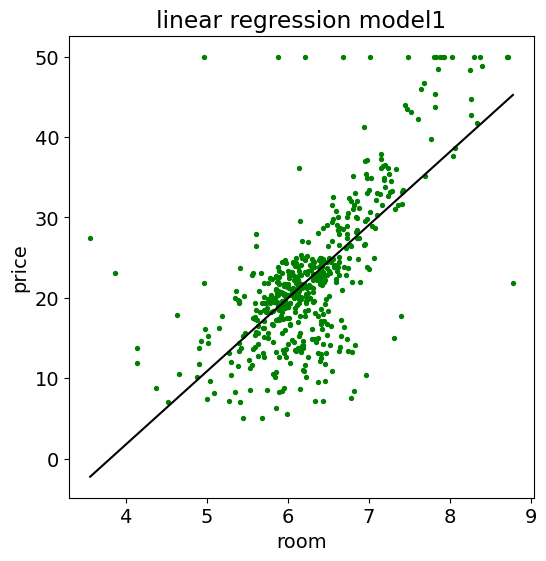

In [166]:
#matplotlib 이용
plt.scatter(x1, yt, s=8, c='g')
plt.xlabel('room')
plt.ylabel('price')
plt.title('linear regression model1')
#x와 y의 최대, 최솟값을 구해서 (x최소,y최소)와 (x최대,y최대)를 두 점으로 잡고 직선을 그림
#reshape(-1,1)=남은 배열의 길이와 남은 차원으로부터 추정해서 알아서 행 결정
x_array=np.array((x1.min(),x1.max())).reshape(-1,1)
X_array=torch.Tensor(x_array) #tensor 형태로 변환
with torch.no_grad():
    Y_array=net(X_array)
#print(X_array)
#print(Y_array)
plt.plot(X_array.data, Y_array.data, c='k')
plt.show()